In [1]:
import sqlalchemy as sq
import pandas as pd

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv("cdc.csv")
# retain only cumulative numbers for all sexes and ages, and for the entire country
for col in ['Data As Of','Start Date','End Date']:
    df[col] = pd.to_datetime(df[col])
df['Age Group'] = df['Age Group'].astype('category')
df = df[(df['Sex'] == 'All Sexes') & (df['State'] == 'United States') & (df['Group'] == 'By Total')]
df = df.drop(['Group','Year','Month','State','Sex','Footnote','Start Date','End Date'],axis=1)

In [115]:
new_cols = [col.lower().replace(' ','_').replace('-','').replace(',','') for col in df.columns]
df.columns = new_cols

In [116]:
df['perc_deaths'] = (df['covid19_deaths']/df['total_deaths']) * 100
df['perc_of_all_ages_covid'] = (df['covid19_deaths'] / df.loc[0,'covid19_deaths']) * 100
df['perc_of_all_ages_total'] = (df['total_deaths'] / df.loc[0,'total_deaths']) * 100

In [117]:
age_group = list(df['age_group'])

In [118]:
ages = [
 '0-17 years',
 '18-29 years',
 '30-39 years',
 '40-49 years',
 '50-64 years',
 '65-74 years',
 '75-84 years',
 '85 years and over']

In [119]:
def graph_maker(yaxis, title, all_ages=True):
    sns.catplot(x='age_group',y=yaxis,data=df, kind='bar', 
            order=ages)
    plt.title(title)
    plt.xticks(horizontalalignment='right',rotation=45)
    plt.xlabel("")
    if all_ages:
        plt.hlines(y = df.loc[0,yaxis], xmin = -0.5, xmax = 7.5, label = 'All Ages', linestyle=':', color='red')
        plt.legend()

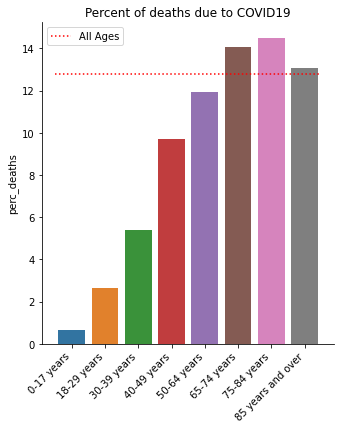

In [120]:
graph_maker("perc_deaths", title="Percent of deaths due to COVID19")

In [128]:
df.columns

Index(['data_as_of', 'age_group', 'covid19_deaths', 'total_deaths',
       'pneumonia_deaths', 'pneumonia_and_covid19_deaths', 'influenza_deaths',
       'pneumonia_influenza_or_covid19_deaths', 'perc_deaths',
       'perc_of_all_ages_covid', 'perc_of_all_ages_total'],
      dtype='object')

In [133]:
df_melt = df[['age_group','perc_of_all_ages_covid', 'perc_of_all_ages_total']].melt(id_vars=['age_group'])

<AxesSubplot:xlabel='age_group', ylabel='value'>

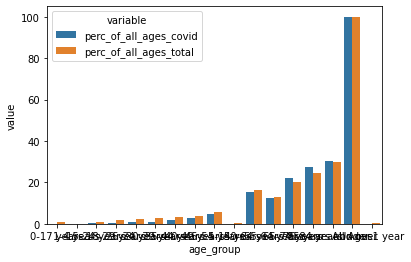

In [135]:
sns.barplot(x='age_group',y='value',data=df_melt,hue='variable')

In [14]:
engine = sq.create_engine("sqlite:///data/covid_news.db")
cnx = engine.connect()

In [15]:
meta = sq.MetaData()
meta.reflect(bind=engine)

In [16]:
meta.tables.keys()

dict_keys(['news'])

In [18]:
df = pd.read_sql('news',con=cnx)

In [20]:
df

,location,dates,titles,hovertexts,ax,ay,label
0,United States,"April 13, 2021",JJ vaccine <br> paused,CDC and FDA pause distribution <br> of J&J vac...,-30,-70,vax
1,United States,"April 23, 2021",JJ vaccine <br> unpaused,US lifts pause in use of J&J vaccine <br> afte...,-30,-70,vax
2,Canada,"March 29, 2021",AZ vaccine pause <br> recommended,"Suspend AstraZeneca use for people under 55, <...",-50,-90,vax
3,North America,"March 29, 2021",AZ vaccine pause <br> recommended,"Suspend AstraZeneca use for people under 55, <...",-30,-70,vax
4,North America,"April 13, 2021",JJ vaccine <br> paused,CDC and FDA pause distribution <br> of J&J vac...,-30,-70,vax
5,North America,"April 23, 2021",JJ vaccine <br> unpaused,US lifts pause in use of J&J vaccine <br> afte...,-30,-70,vax
6,Europe,"March 7, 2021",Austria suspends <br> AZ use,Austria suspends AstraZeneca <br> COVID-19 vac...,20,-60,vax
7,Europe,"April 3, 2021",EMA report <br> released,EMA finds link to very rare cases of unusual b...,20,-60,vax
8,India,"March 25, 2021",Restricted <br> AZ exports,India cuts back on vaccine exports as infectio...,-30,-70,vax
9,India,"April 20, 2021",Foreign made <br> vaccines imported,"Pfizer, Moderna, J&J, Sputnik V vaccines have ...",-30,-70,vax
